#  Analiza zachowania walut oraz wybranych rynków gospodarczych w obliczu pandemii koronawirusa.

##### Niniejsza analiza oparta jest o dane pochodzące z otwartego środowiska API udostępnionego przez Narodowy Bank Polski. Wszystkie pozyskane dane i materiały użyte w celu analizy są darmowe, a odnośniki do nich zostały udostępnione na końcu.Wszystkie wnioski, spostrzeżenia i opinie są subiektywne. 

###### Import biblotek wykorzystanych w projekcie.

In [196]:
import pandas as pd
import requests
from datetime import date as dt
from matplotlib import pyplot as plt

###### Pobranie danych dotyczących kursu następujących walut począwszy od dnia 1 stycznia 2020 roku względem polskiego złotego (PLN):
* USD - Dolar amerykański
* EUR - Euro
* JPY - Jen japoński
* GBP - Brytyjski funt szterling
* CHF - Frank szwajcarski
* NOK - Korona norweska
* SEK - Korona szwedzka
* CNY - Yuan renminbi
* UAH - Hrywna ukraińska
* RON - Lej rumuński
* CZK - Korona czeska
* HUF - Forint węgierski
* BGN - Lew bułgarski
* TRY - Lira turecka
* EGP - Funt egipski
* COP - Peso kolumbijskie
* INR - Rupia indyjskia


###### Funkcja przygotowywująca link do REST API NBP.

In [197]:
def joinHTTP(*args):
    return ('/').join(args)

###### Preparacja danych pod API.

In [198]:
currencies = {"usd":"a","eur":"a","jpy":"a","gbp":"a","chf":"a","nok":"a","sek":"a","cny":"a","uah":"a","ron":"a","czk":"a","huf":"a","bgn":"a","try":"a","egp":"b","cop":"b","inr":"a"}
httpBase = 'https://api.nbp.pl/api/exchangerates/rates/'
startDate = '2020-01-01'
endDate = dt.today().strftime('%Y-%m-%d')

###### Tworzenie listy wartości z zadanego czasu tj. 2020-01-01 - dzieńDzisiejszy()

In [199]:
currencies_request = [requests.get(joinHTTP(httpBase,value,key,startDate,endDate)) for (key,value) in currencies.items()]

###### Rzutowanie typu na PandasDataFrame.

In [200]:
curriencies_frame = [pd.read_json(currencies_request[i].content) for i in range(0,len(currencies))]

###### Tworzenie słownika średnich wartości dziennych dla poniższych (currs) walut.
###### Następnie:
* 1szy for - iteracja po walutach
* 2gi for - tworzenie list dziennych średnich wartości średnich dla danej waluty

In [201]:
currs = ['usd', 'eur', 'jpy', 'gbp', 'chf', 'nok', 'sek', "cny", "uah", "ron", "czk", "huf", "bgn", "try", "egp", "cop", "inr"]
avgCurrenciesDict = dict()
updatesCurrenciesDict = dict()
dataFormat = '%Y-%m-%d'
for i in range(len(currs)):
    avgCurrenciesDict[currs[i]] = [element['mid'] for element in curriencies_frame[i].rates]
    updatesCurrenciesDict[currs[i]] = [datetime.datetime.strptime(element['effectiveDate'],dataFormat).date() for element in curriencies_frame[i].rates]
#updatesCurrenciesDict.keys()
#updatesCurrenciesDict['USD']

## Przedstawienie danych na wykresach.

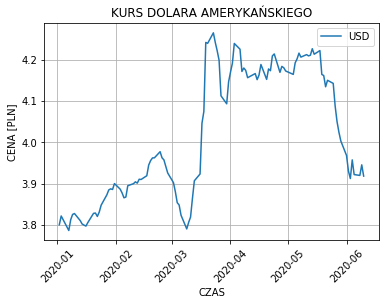

In [202]:
plt.plot(updatesCurrenciesDict['usd'], avgCurrenciesDict['usd'])
plt.xticks(rotation=45)
plt.title("KURS DOLARA AMERYKAŃSKIEGO")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["USD"])
plt.grid()

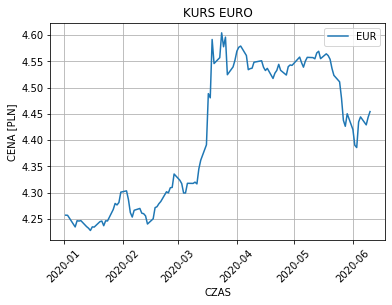

In [203]:
plt.plot(updatesCurrenciesDict['eur'], avgCurrenciesDict['eur'])
plt.xticks(rotation=45)
plt.title("KURS EURO")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["EUR"])
plt.grid()

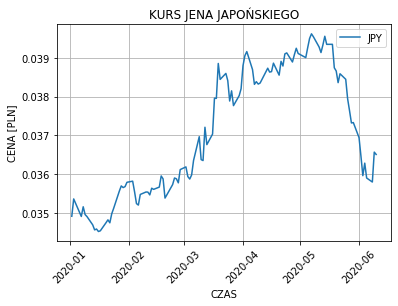

In [204]:
plt.plot(updatesCurrenciesDict['jpy'], avgCurrenciesDict['jpy'])
plt.xticks(rotation=45)
plt.title("KURS JENA JAPOŃSKIEGO")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["JPY"])
plt.grid()

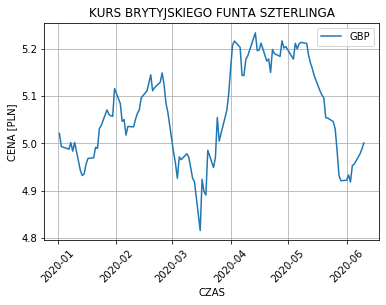

In [205]:
plt.plot(updatesCurrenciesDict['gbp'], avgCurrenciesDict['gbp'])
plt.xticks(rotation=45)
plt.title("KURS BRYTYJSKIEGO FUNTA SZTERLINGA")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["GBP"])
plt.grid()

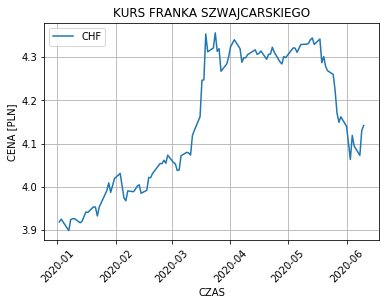

In [206]:
plt.plot(updatesCurrenciesDict['chf'], avgCurrenciesDict['chf'])
plt.xticks(rotation=45)
plt.title("KURS FRANKA SZWAJCARSKIEGO")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["CHF"])
plt.grid()

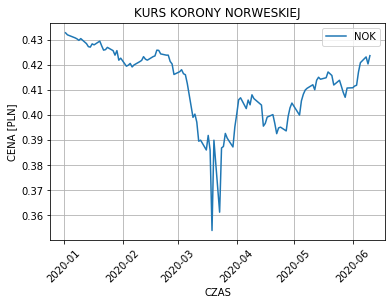

In [207]:
plt.plot(updatesCurrenciesDict['nok'], avgCurrenciesDict['nok'])
plt.xticks(rotation=45)
plt.title("KURS KORONY NORWESKIEJ")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["NOK"])
plt.grid()

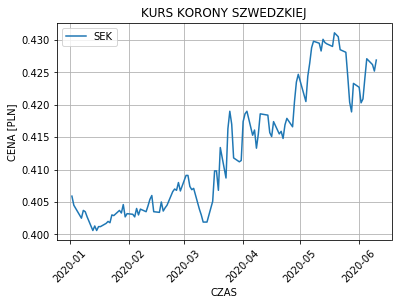

In [208]:
plt.plot(updatesCurrenciesDict['sek'], avgCurrenciesDict['sek'])
plt.xticks(rotation=45)
plt.title("KURS KORONY SZWEDZKIEJ")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["SEK"])
plt.grid()

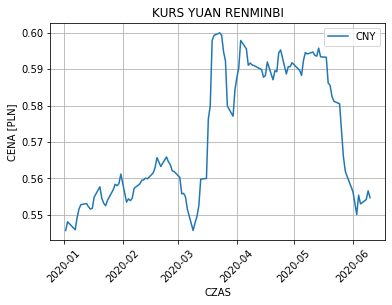

In [209]:
plt.plot(updatesCurrenciesDict['cny'], avgCurrenciesDict['cny'])
plt.xticks(rotation=45)
plt.title("KURS YUAN RENMINBI")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["CNY"])
plt.grid()

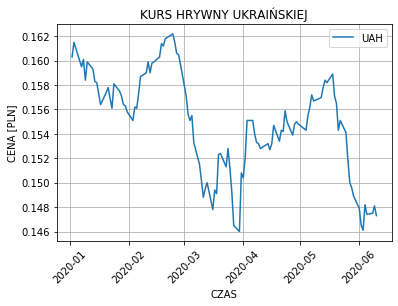

In [210]:
plt.plot(updatesCurrenciesDict['uah'], avgCurrenciesDict['uah'])
plt.xticks(rotation=45)
plt.title("KURS HRYWNY UKRAIŃSKIEJ")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["UAH"])
plt.grid()

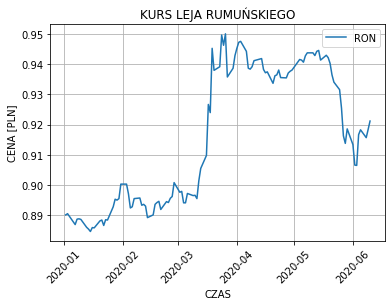

In [211]:
plt.plot(updatesCurrenciesDict['ron'], avgCurrenciesDict['ron'])
plt.xticks(rotation=45)
plt.title("KURS LEJA RUMUŃSKIEGO")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["RON"])
plt.grid()

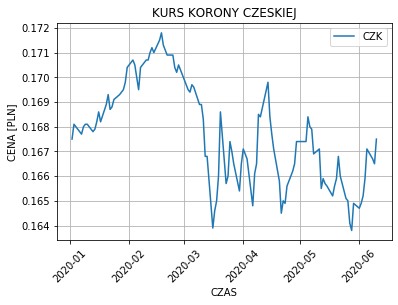

In [212]:
plt.plot(updatesCurrenciesDict['czk'], avgCurrenciesDict['czk'])
plt.xticks(rotation=45)
plt.title("KURS KORONY CZESKIEJ")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["CZK"])
plt.grid()

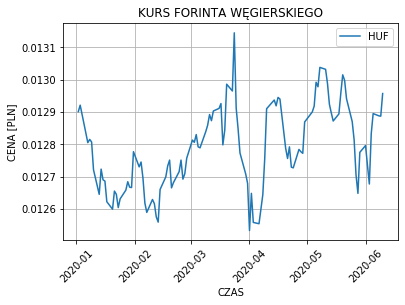

In [213]:
plt.plot(updatesCurrenciesDict['huf'], avgCurrenciesDict['huf'])
plt.xticks(rotation=45)
plt.title("KURS FORINTA WĘGIERSKIEGO")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["HUF"])
plt.grid()

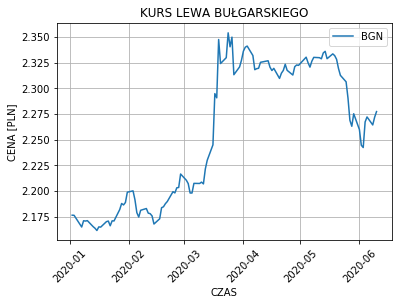

In [219]:
plt.plot(updatesCurrenciesDict['bgn'], avgCurrenciesDict['bgn'])
plt.xticks(rotation=45)
plt.title("KURS LEWA BUŁGARSKIEGO")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["BGN"])
plt.grid()

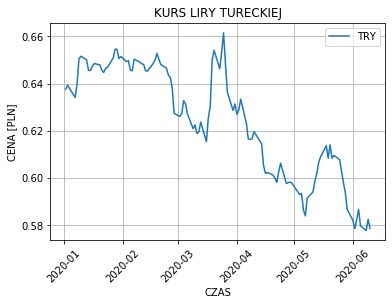

In [215]:
plt.plot(updatesCurrenciesDict['try'], avgCurrenciesDict['try'])
plt.xticks(rotation=45)
plt.title("KURS LIRY TURECKIEJ")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["TRY"])
plt.grid()

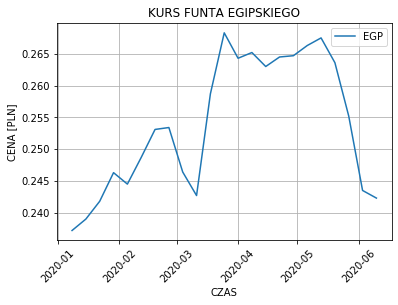

In [216]:
plt.plot(updatesCurrenciesDict['egp'], avgCurrenciesDict['egp'])
plt.xticks(rotation=45)
plt.title("KURS FUNTA EGIPSKIEGO")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["EGP"])
plt.grid()

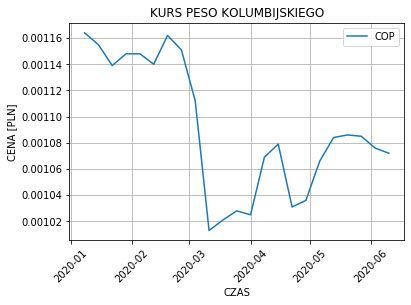

In [217]:
plt.plot(updatesCurrenciesDict['cop'], avgCurrenciesDict['cop'])
plt.xticks(rotation=45)
plt.title("KURS PESO KOLUMBIJSKIEGO")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["COP"])
plt.grid()

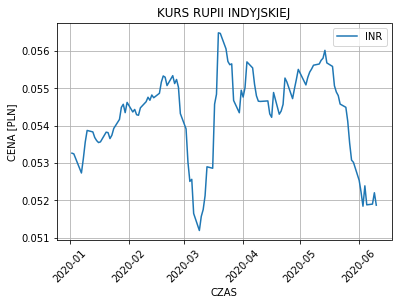

In [220]:
plt.plot(updatesCurrenciesDict['inr'], avgCurrenciesDict['inr'])
plt.xticks(rotation=45)
plt.title("KURS RUPII INDYJSKIEJ")
plt.xlabel("CZAS")
plt.ylabel("CENA [PLN]")
plt.legend(["INR"])
plt.grid()

## Wnioski: